In [279]:
# импорт библиотек
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [280]:
# датасет выгружен с сайта Kaggle
# In Hospital Mortality Prediction
# предсказываем выжил ли пациент исходя из его показателей здоровья
df = pd.read_csv('C:/Users/alexe/Downloads/data01.csv')

In [72]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [44]:
df.shape

(1177, 51)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [46]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


<AxesSubplot:xlabel='age', ylabel='count'>

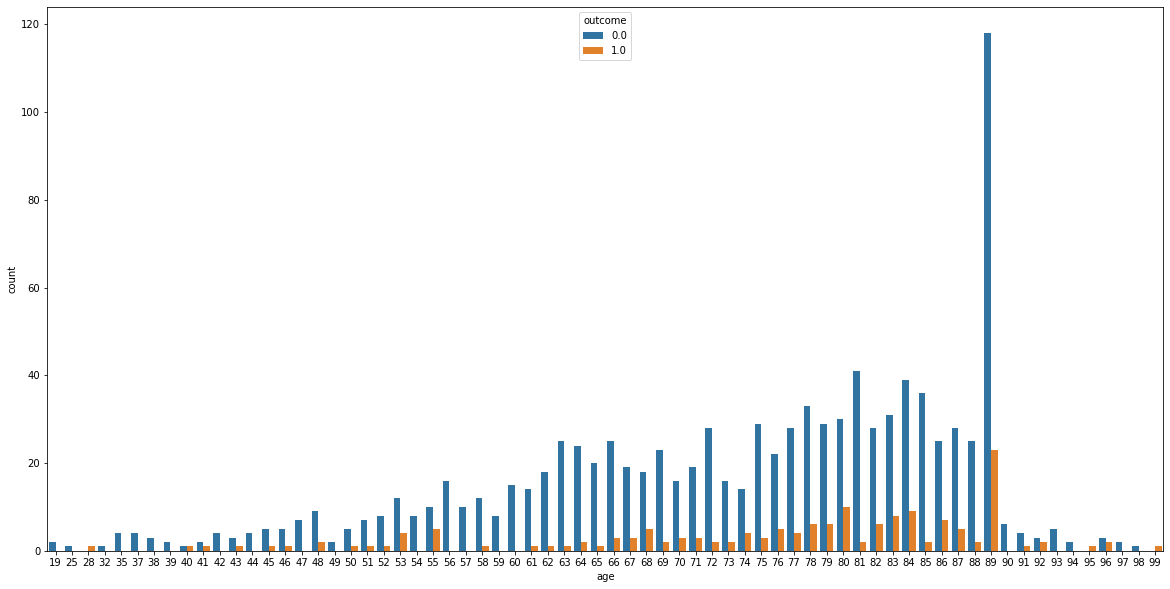

In [192]:
plt.figure(figsize = (20,10))
sns.countplot(x = df.age, data = df, hue = 'outcome')

<AxesSubplot:xlabel='age', ylabel='BMI'>

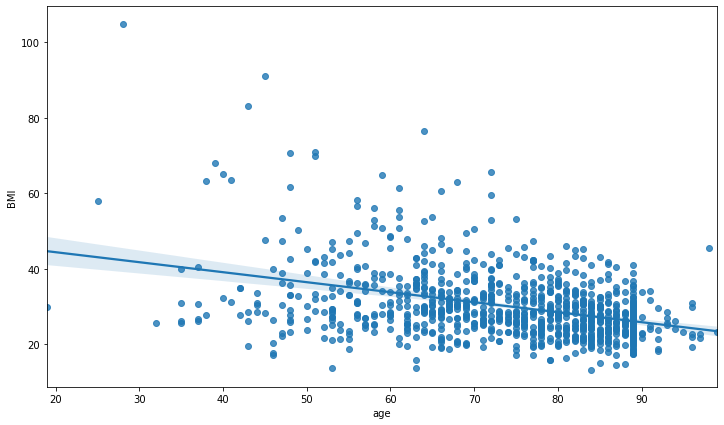

In [202]:
plt.figure(figsize = (12,7))
sns.regplot(x = df.age, y = df.BMI)

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x = df.age, data = df, hue = 'outcome')

In [221]:
df.groupby('outcome').agg({'hypertensive':'count','atrialfibrillation':'count'})

,hypertensive,atrialfibrillation
outcome,,
0.0,1017,1017
1.0,159,159


In [278]:
df.groupby('outcome').agg({'diabetes':'value_counts', 'hypertensive':'value_counts'})

diabetes  hypertensive
0.0 0       579           274
    1       438           743
1.0 0       102            58
    1        57           101

In [234]:
df[df['gendera'] == 1].count()

group                       559
ID                          559
outcome                     558
age                         559
gendera                     559
BMI                         475
hypertensive                559
atrialfibrillation          559
CHD with no MI              559
diabetes                    559
deficiencyanemias           559
depression                  559
Hyperlipemia                559
Renal failure               559
COPD                        559
heart rate                  551
Systolic blood pressure     548
Diastolic blood pressure    548
Respiratory rate            551
temperature                 550
SP O2                       551
Urine output                537
hematocrit                  559
RBC                         559
MCH                         559
MCHC                        559
MCV                         559
RDW                         559
Leucocyte                   559
Platelets                   559
Neutrophils                 485
Basophil

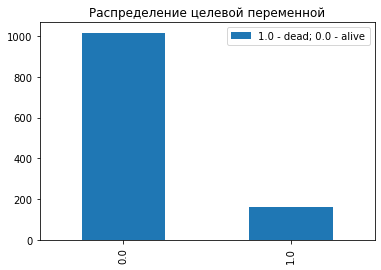

In [311]:
df['outcome'].value_counts().plot(kind='bar', label='1.0 - dead; 0.0 - alive')
plt.legend()
plt.title('Распределение целевой переменной');

In [302]:
# получение категориальных признаков
cols_cat = ['hypertensive', 'CHD with no MI', 'diabetes', 'depression','Hyperlipemia', 'COPD','atrialfibrillation','Renal failure','deficiencyanemias']

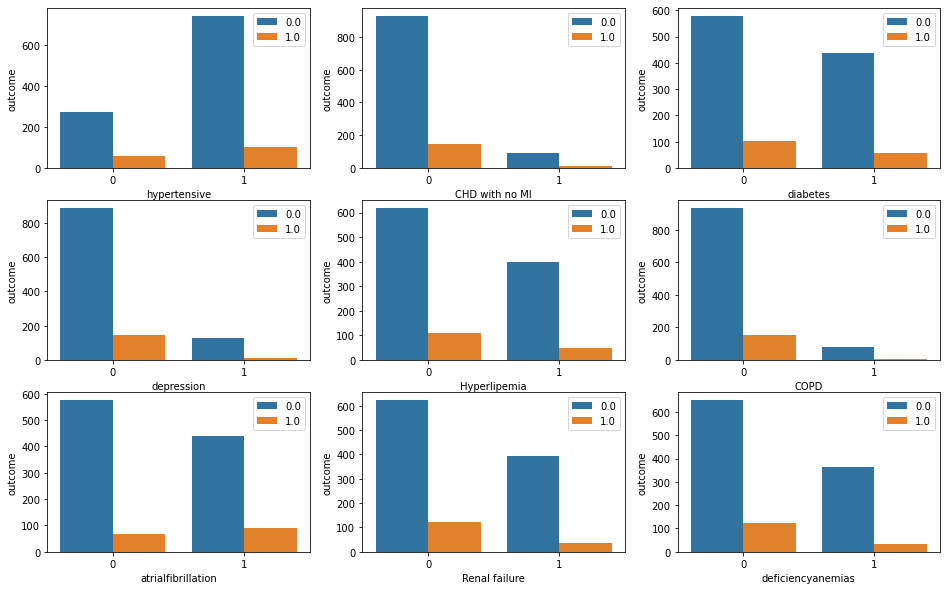

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for idx, feat in  enumerate(cols_cat):
    sns.countplot(x=feat, hue='outcome', data=df, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].legend()
    axes[idx // 3, idx % 3].set_xlabel(feat)
    axes[idx // 3, idx % 3].set_ylabel('outcome');

<AxesSubplot:xlabel='BMI', ylabel='outcome'>

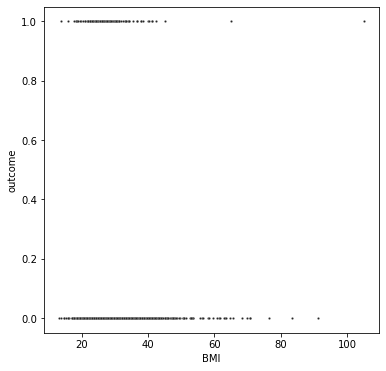

In [51]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=df.BMI, y=df.outcome, s=5, color=".15")


<AxesSubplot:xlabel='outcome', ylabel='BMI'>

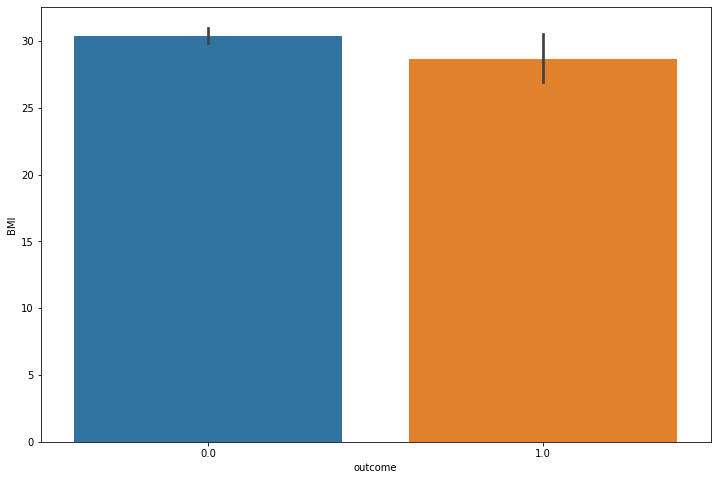

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x = df.outcome, y = df.BMI)

<AxesSubplot:>

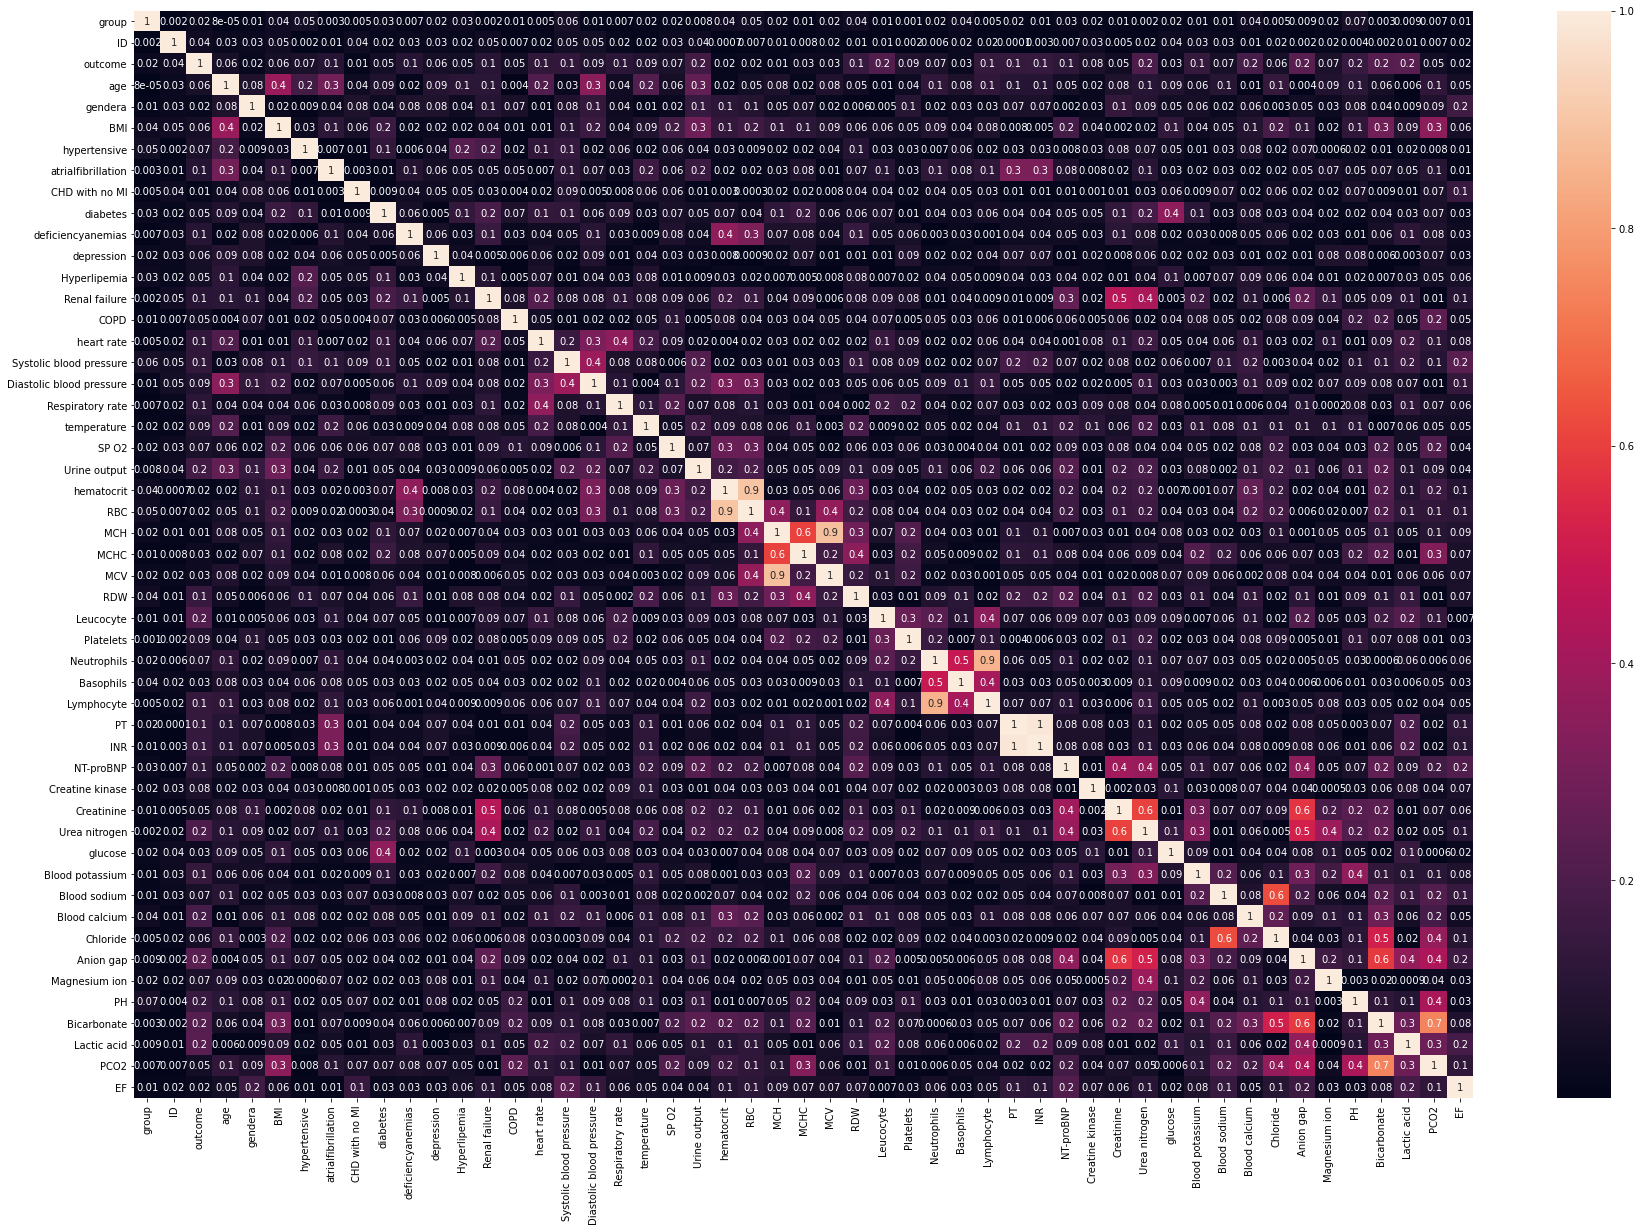

In [281]:
# корреляция признаков
corr = df.corr()
corr_abs = corr.abs()
plt.figure(figsize=(30,20))
sns.heatmap(corr_abs, annot = True,fmt='.1g')

In [75]:
#удаление сильноскореллированых признаков
df_without_corr = df.drop(columns = ['group','ID', 'hematocrit', 'MCV', 'MCH','Creatinine','Chloride','Bicarbonate','Neutrophils'])

In [76]:
#функция визуализации пропусков
def visual_missing(df):
    return sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='viridis')

<AxesSubplot:>

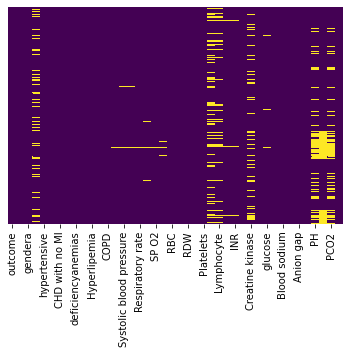

In [77]:
#визулиазиция пропусков
visual_missing(df_without_corr)

In [62]:
#процент пропущенных значений в признаках
print(round((df_without_corr.isnull().sum()/df_without_corr.shape[0]*100),2).sort_values(ascending = False))

PCO2                        24.98
PH                          24.81
Basophils                   22.01
Lactic acid                 19.46
BMI                         18.27
Creatine kinase             14.02
Lymphocyte                  12.32
Urine output                 3.06
PT                           1.70
INR                          1.70
temperature                  1.61
glucose                      1.53
Systolic blood pressure      1.36
Diastolic blood pressure     1.36
Respiratory rate             1.10
SP O2                        1.10
heart rate                   1.10
Blood calcium                0.08
outcome                      0.08
diabetes                     0.00
deficiencyanemias            0.00
depression                   0.00
Hyperlipemia                 0.00
Renal failure                0.00
CHD with no MI               0.00
atrialfibrillation           0.00
hypertensive                 0.00
gendera                      0.00
age                          0.00
EF            

In [78]:
#удаление строк с пропущенным значениеv в целевой переменной 'outcome'
df_without_miss = df_without_corr.dropna(subset=['outcome'])
#удаление признаков, где процент пропущенных значений больше 15
df_without_miss.drop(columns = ['Basophils', 'PH','PCO2','Lactic acid'], inplace=True)
cols_isnull = [col for col in df_without_miss.columns if df_without_miss[col].isnull().any()]
cols_isnull

['BMI',
 'heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Respiratory rate',
 'temperature',
 'SP O2',
 'Urine output',
 'Lymphocyte',
 'PT',
 'INR',
 'Creatine kinase',
 'glucose',
 'Blood calcium']

In [282]:
# замена пропусков средними значениями
for col in cols_isnull:
    df_without_miss[col].fillna(df_without_miss[col].mean(), inplace=True)      

<AxesSubplot:>

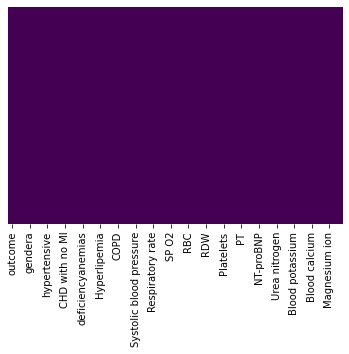

In [80]:
#визуализация пропущенных значений 
visual_missing(df_without_miss)

In [81]:
#проверка размерности
df_without_miss.shape

(1176, 38)

In [82]:
#выведим список признаков с непрерывными значениями
cols_cont = [col for col in df_without_miss.select_dtypes(include=['float64']) if col!= 'outcome']
cols_cont

['BMI',
 'heart rate',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Respiratory rate',
 'temperature',
 'SP O2',
 'Urine output',
 'RBC',
 'MCHC',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Lymphocyte',
 'PT',
 'INR',
 'NT-proBNP',
 'Creatine kinase',
 'Urea nitrogen',
 'glucose',
 'Blood potassium',
 'Blood sodium',
 'Blood calcium',
 'Anion gap',
 'Magnesium ion']

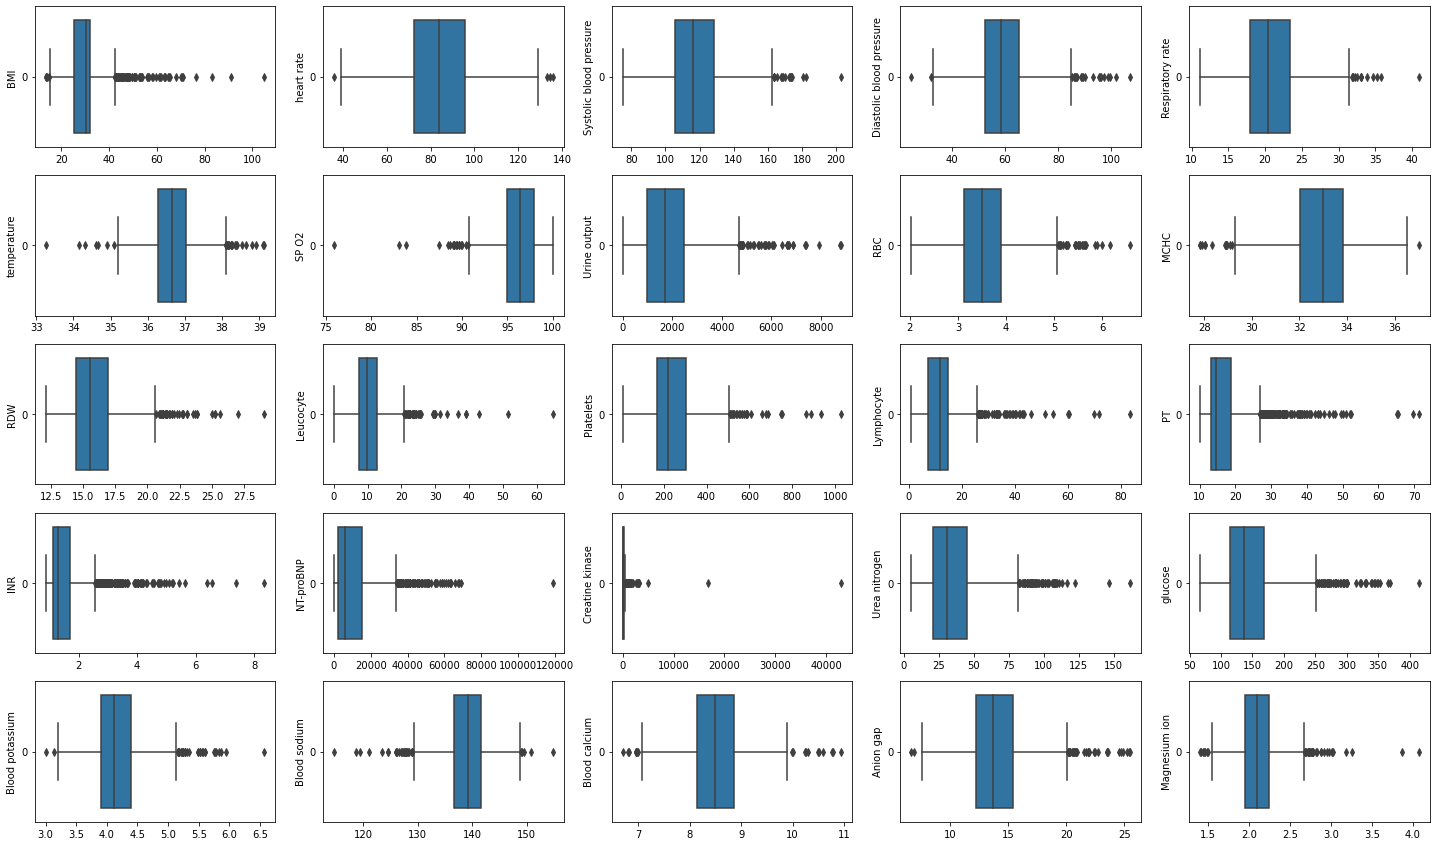

In [283]:
# построение графиков boxplot для идентификации выбросов
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 15))

for idx, feat in  enumerate(cols_cont):
    sns.boxplot(data=df_without_miss[feat], ax=axes[idx // 5, idx % 5],orient = 'h')
    axes[idx // 5, idx % 5].set_ylabel(feat)

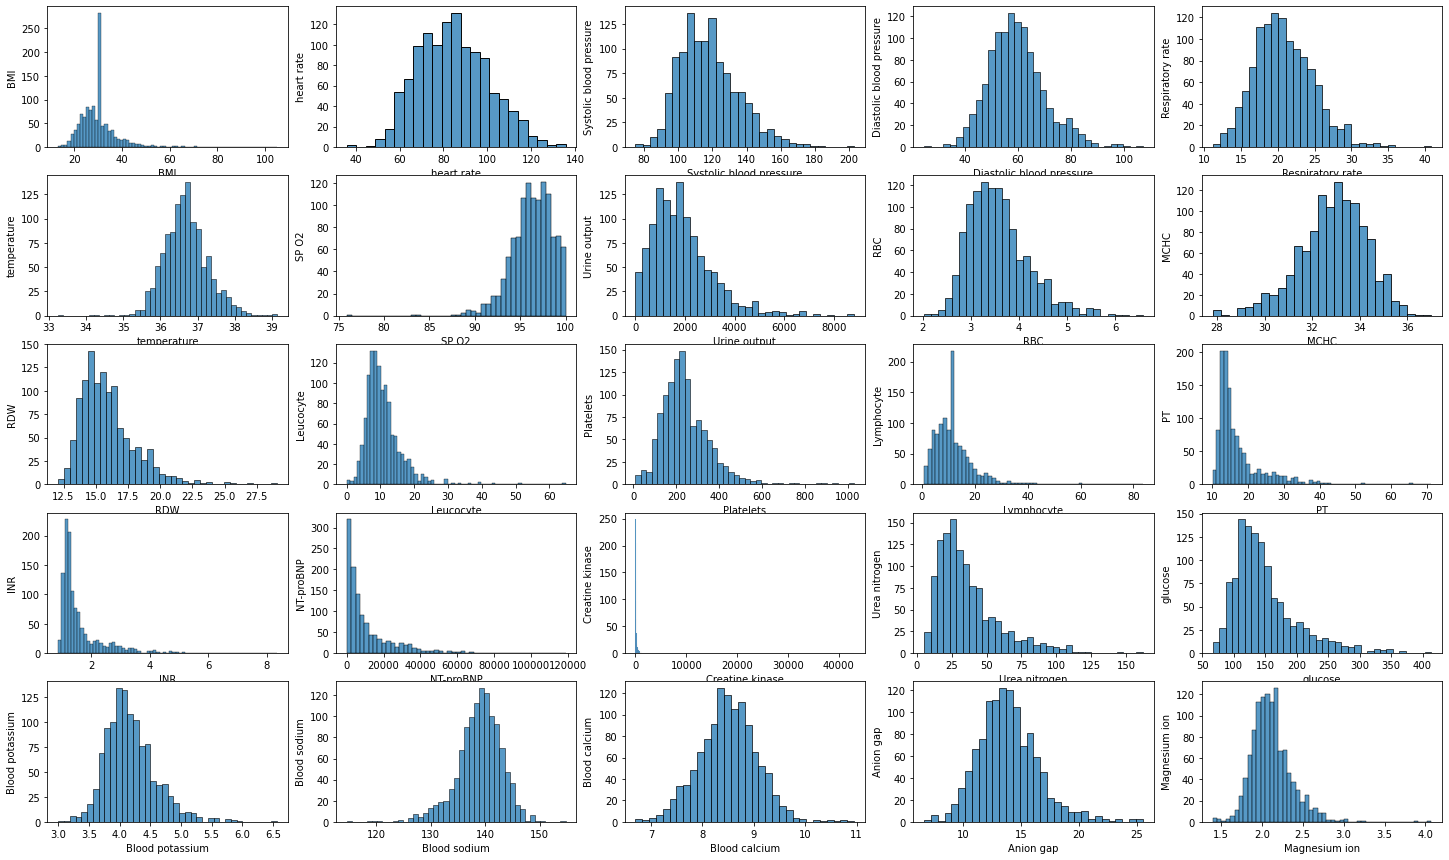

In [284]:
# построение графиков распредлений признаков
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 15))

for idx, feat in  enumerate(cols_cont):
    sns.histplot(df_without_miss[feat], ax=axes[idx // 5, idx % 5])
    axes[idx // 5, idx % 5].set_ylabel(feat)

In [86]:
#неинформативность
low_info_feat=[]
for col in df_without_miss.columns:
    count = (df_without_miss[col].value_counts()/df_without_miss.shape[0]).iloc[0]
    if count>0.9:
        low_info_feat.append(col)
print(low_info_feat)

['CHD with no MI', 'COPD']


In [285]:
# удаление неинформативных признаков
df_without_uninform = df_without_miss.drop(columns = ['CHD with no MI', 'COPD'])

In [286]:
# логарифмирование признаков для нормализации распределения и уменьшения влияния выбросов
df_log = df_without_uninform.copy()
if any(df_log[var] <= 0):
    pass
else:
    df_log[var] = np.log(df_log[var])
for var in cols_cont:
    if any(df_log[var] < 0):
        pass
    else:
        df_log[var] = (df_log[var]+1).transform(np.log)

In [98]:
df_log.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,diabetes,deficiencyanemias,depression,Hyperlipemia,...,NT-proBNP,Creatine kinase,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Anion gap,Magnesium ion,EF
0,0.0,72,1,3.652946,0,0,1,1,0,1,...,7.579168,5.003946,3.931826,4.750450,1.760727,4.939855,2.135779,2.650892,0.674209,55
1,0.0,75,2,3.440042,0,0,0,1,0,0,...,7.776954,4.120662,3.060271,5.000585,1.695616,4.940848,2.215119,2.521274,0.491798,55
2,0.0,83,2,3.316824,0,0,0,1,0,0,...,8.314342,2.833213,3.551258,5.010635,1.920592,4.953813,2.226424,2.397895,0.570293,35
3,0.0,43,2,4.433962,0,0,0,0,0,0,...,6.505784,4.454347,2.790288,4.861749,1.683927,4.938065,2.349175,2.592051,0.509320,55
4,0.0,75,2,3.491186,1,0,0,1,0,0,...,10.335367,4.724434,3.784190,4.988730,1.754980,4.924835,2.275556,2.782952,0.405982,55


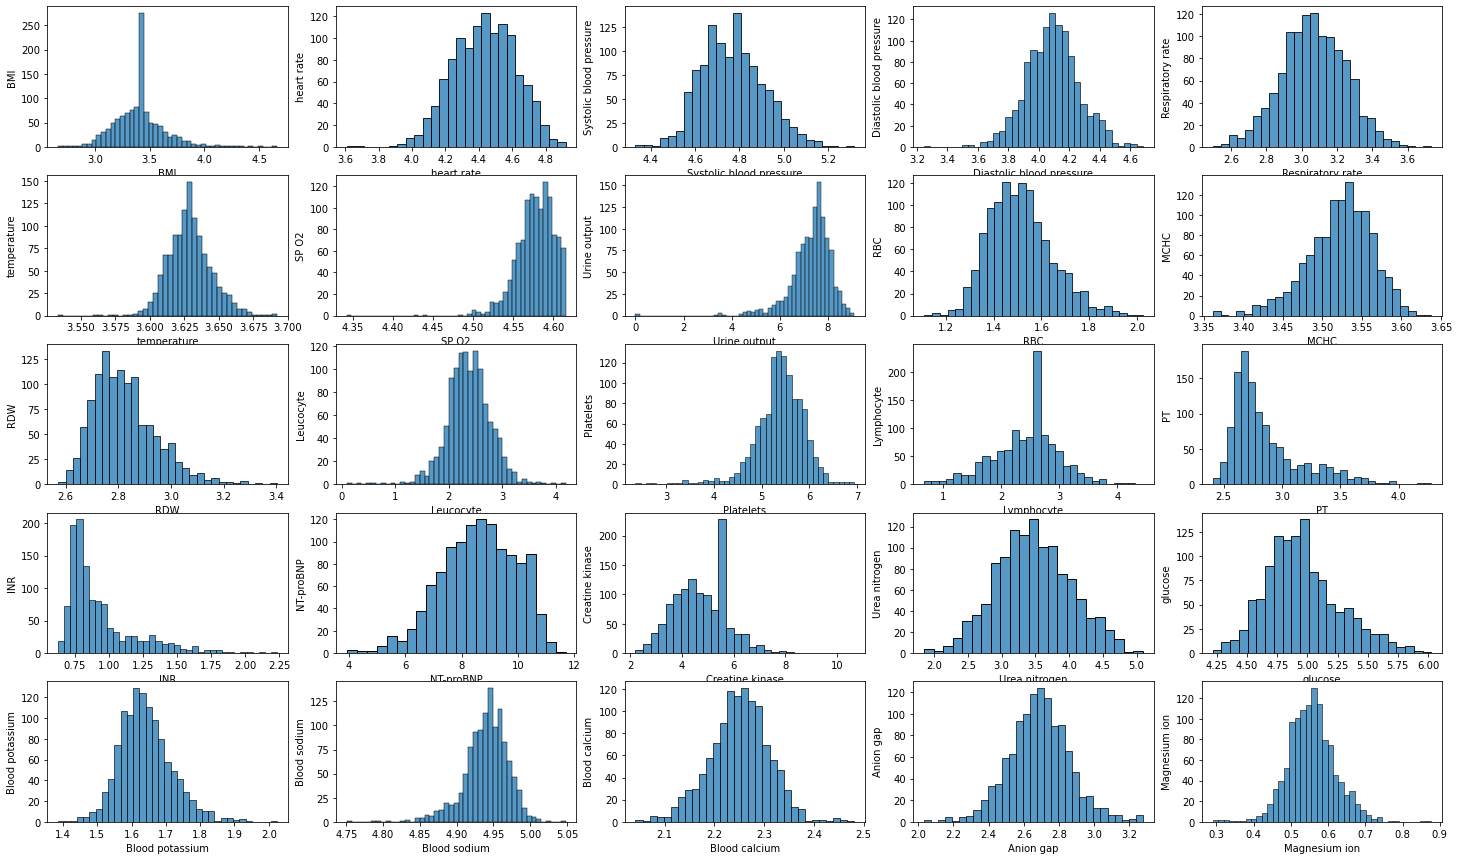

In [287]:
# построение графиков распредления признаков после логарифмирования
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 15))

for idx, feat in  enumerate(cols_cont):
    sns.histplot(df_log[feat], ax=axes[idx // 5, idx % 5])
    axes[idx // 5, idx % 5].set_ylabel(feat)

In [288]:
# проверка размерности
df_log.shape

(1176, 36)

# Логистическая регрессия

In [289]:
# обучаем модель без логарифмирования

In [101]:
X = df_without_uninform.drop(columns = ['outcome'])

In [102]:
y = df_without_uninform['outcome']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# используем метрику оценки качетсва модели ROC-AUC по прчине дисбаланса классов 
lr = LogisticRegression(C=0.001,random_state=5, class_weight='balanced')
lr.fit(X_train,y_train)
lr.predict(X_test)
roc_auc_score(y_test, lr.predict(X_test))

0.6938109912686183

In [292]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [293]:
# подбираем гиперпараметры с помощью кросс-валидации используя стратифицированную кросс-валидацию
grid_search = GridSearchCV(lr, parameters, n_jobs=-1, scoring ='roc_auc', cv=skf)
grid = grid_search.fit(X_train, y_train)
grid.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [294]:
grid.best_score_

0.7470628371945415

In [295]:
# подбор гиперпараметров позволил повысить качество модели

In [296]:
# обучаем модель с логарифмированием

In [109]:
X_log = df_log.drop(columns = ['outcome'])

In [110]:
y_log = df_log['outcome']

In [111]:
X_train_log, X_test_log, y_train_log, y_test_log =  train_test_split(X_log, y_log, test_size=0.33, random_state=42)

In [113]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
parameters_log = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [184]:
grid_search_log = GridSearchCV(lr, parameters, n_jobs=-1, scoring ='roc_auc', cv=skf)
grid_log = grid_search_log.fit(X_train_log, y_train_log)
grid_log.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', random_state=5)

In [185]:
grid_log.best_score_

0.7790167142706018

In [297]:
# благодаря логарифмированию признаков удалось повысить качество модели

# Градиентный бустинг (библиотека XGBoost)

In [182]:
import xgboost as xgb

xgb_params1 = {
    "booster": "gbtree",
    "max_depth": 3,
    "eta": 0.1,
    "silent": 1,
    "objective": "binary:logistic",
    "nthread": 1,
}
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
dtrain_log = xgb.DMatrix(X_train_log, y_train_log)
dtest_log = xgb.DMatrix(X_test_log, y_test_log)
bst = xgb.train(xgb_params1, dtrain, num_boost_round=100)
preds = bst.predict(dtest)


[00:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [183]:
roc_auc_score(y_test, preds)

0.8112994350282486

In [298]:
# качество модели повысилось при использовании XGBoost

In [299]:
# осуществим подбор параметров XGBoost с помощью библиотеки hyperopt
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [131]:
def score(params):
    print("Training with params:")
    print(params)
    params["max_depth"] = int(params["max_depth"])
    dtrain1 = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params, dtrain1, params["num_round"])
    predictions = model.predict(dvalid)
    score = roc_auc_score(y_test, predictions)
    print("\tScore {0}\n\n".format(score))
    return {"loss": score, "status": STATUS_OK}

In [157]:
def optimize(trials):
    space = {
        "num_round": 100,
        "learning_rate": hp.quniform("eta", 0.005, 0.1, 0.005),
        "max_depth": hp.quniform("max_depth", 3, 14, 1),
        "min_child_weight": hp.quniform("min_child_weight", 1, 10, 1),
        "subsample": hp.quniform("subsample", 0.5, 1, 0.05),
        "gamma": hp.quniform("gamma", 0.5, 1, 0.01),
        "colsample_bytree": hp.quniform("colsample_bytree", 0.4, 1, 0.05),
        "eval_metric": "error",
        "objective": "binary:logistic",
        "nthread": 4,
        "silent": 1,
    }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=10)
    return best

In [158]:
trials = Trials()
best_params = optimize(trials)
best_params

Training with params:                                                                                                  
{'colsample_bytree': 0.65, 'eval_metric': 'error', 'gamma': 0.55, 'learning_rate': 0.065, 'max_depth': 5.0, 'min_child_weight': 7.0, 'nthread': 4, 'num_round': 100, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.75}
[00:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573:                   
Parameters: { "num_round", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


	Score 0.8687211093990754                                                                                              


Training with params:                                                                                           

{'colsample_bytree': 0.45,
 'eta': 0.08,
 'gamma': 0.63,
 'max_depth': 8.0,
 'min_child_weight': 3.0,
 'subsample': 0.55}

In [159]:
best_params["max_depth"] = int(best_params["max_depth"])
best_params["eval_metric"] = "error"
best_params["objective"] = "binary:logistic"
best_params["nthread"] = 4
best_params["silent"] = 1

In [175]:
%%time
xgbCvResult = xgb.cv(
    best_params, dtrain, num_boost_round=500, nfold=3, early_stopping_rounds=50)

[00:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

In [176]:
best_num_round = np.argmin(xgbCvResult["test-error-mean"])
best_num_round

74

In [177]:
bestXgb = xgb.train(best_params, dtrain, num_boost_round=best_num_round)

[00:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [178]:
xgboost_predict_proba = bestXgb.predict(dtest)

In [179]:
roc_auc_score(y_test, xgboost_predict_proba)

0.8541859270672829

In [300]:
# подбор гиперпараметров позволил повысить качество модели
# Лучшее качество удалось получить при помощи XGBoost и его настройки